In [96]:
import os

output_model_path = os.environ["DATA"] + "/05_chapter_SOTA/04.01_search_disgraceful_molecule"
output_fig_path = os.environ["FIGURES"] + "/05_chapter_SOTA/04.01_search_disgraceful_molecule"


# QED gaussian
mu = 0.8
sigma = 0.5

# SAScore lin sigm
a = -1
b = 8
l = 20


### Defining and testing wrappers

In [97]:
from math import exp
from scipy.stats import norm

def gaussian_wrapper(value, mu, sigma):
    return norm(loc=mu, scale=sigma).pdf(value)

def lin_sigm_wrapper(value, a, b, l):
    return 1 / (1 + exp(l * (a * value + b)))


### Testing gaussian

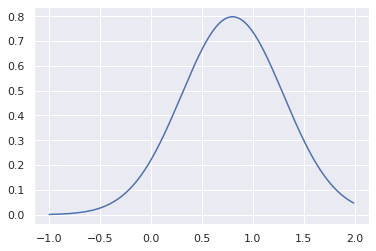

In [98]:
import numpy as np
import seaborn as sns
sns.set()

x_arr = np.arange(-1, 2, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(gaussian_wrapper(x, mu, sigma))
    
sns.lineplot(x_arr, y_arr)

### Testing lin sigmoid

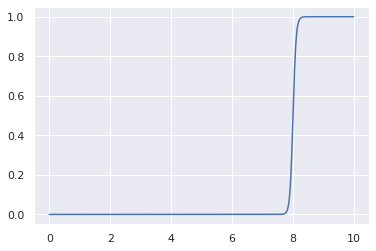

In [99]:
x_arr = np.arange(0, 10, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(lin_sigm_wrapper(x, a, b, l))
    
sns.lineplot(x_arr, y_arr)

### Defining objective function

In [100]:
from evomol.evomol.molgraphops.molgraph import MolGraph
from rdkit.Chem import MolFromSmiles
from evomol.evomol.evaluation import QEDEvaluationStrategy, SAScoreEvaluationStrategy

def obj_function(smi):
    
    molgraph = MolGraph(MolFromSmiles(smi))
    
    qed_score, _ = QEDEvaluationStrategy().evaluate_individual(molgraph)
    sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(molgraph)
    
    return np.prod([gaussian_wrapper(qed_score, mu, sigma), lin_sigm_wrapper(sa_score, a, b, l)])

### Launching model

In [101]:
from evomol.evomol import run_model

run_model({
    "obj_function": (obj_function, "gaussian_qed_sigm_sa"),
    "action_space_parameters":{
        "atoms": "C,N,O,F"
    },
    "io_parameters": {
        "model_path": output_model_path
    }
})

SYMBOLS LIST : ['C', 'N', 'O', 'F']
Computing descriptors at initialization...
Start pop algorithm
gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 0
best : C
No replacement occurred
gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 1
best : C
gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 

/home/jleguy/Documents/these/prod/prog/evomol/evomol/molgraphops/actionspace.py:767: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  curr_at_type_idx = np.nonzero(mol_at_types == curr_atom_type)


gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 9
best : C
gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 10
best : C
gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00000
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 11
best : C
gaussian_qed_sigm_sa_mean : 0.00000
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_si

gaussian_qed_sigm_sa_mean : 0.00004
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00071
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.01282
total_mean : 0.00004
total_med : 0.00000
total_std : 0.00071
total_min : 0.00000
total_max : 0.01282
new step
step : 36
best : FC12C=C=NC(C1)C21C=N1
gaussian_qed_sigm_sa_mean : 0.00004
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00070
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.01282
total_mean : 0.00004
total_med : 0.00000
total_std : 0.00070
total_min : 0.00000
total_max : 0.01282
new step
step : 37
best : FC12C=C=NC(C1)C21C=N1
gaussian_qed_sigm_sa_mean : 0.00009
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.00111
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.01624
total_mean : 0.00009
total_med : 0.00000
total_std : 0.00111
total_min : 0.00000
total_max : 0.01624
new step
step : 38
best : C1=NC2OC=1C1CC2C12C=N2
gaussian_qed_sigm_sa_mea

new step
step : 63
best : OC12CC3C(=C=N1)C1CNC132
gaussian_qed_sigm_sa_mean : 0.01134
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.04106
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32247
total_mean : 0.01134
total_med : 0.00000
total_std : 0.04106
total_min : 0.00000
total_max : 0.32247
new step
step : 64
best : OC12CC3C(=C=N1)C1CNC132
gaussian_qed_sigm_sa_mean : 0.01199
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.04228
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32247
total_mean : 0.01199
total_med : 0.00000
total_std : 0.04228
total_min : 0.00000
total_max : 0.32247
new step
step : 65
best : OC12CC3C(=C=N1)C1CNC132
gaussian_qed_sigm_sa_mean : 0.01331
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.04511
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32247
total_mean : 0.01331
total_med : 0.00000
total_std : 0.04511
total_min : 0.00000
total_max : 0.32247
new step
step : 66


gaussian_qed_sigm_sa_mean : 0.01762
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.05147
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32525
total_mean : 0.01762
total_med : 0.00000
total_std : 0.05147
total_min : 0.00000
total_max : 0.32525
new step
step : 89
best : ONC1C2(F)C3=C=NC31C21N=N1
gaussian_qed_sigm_sa_mean : 0.01761
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.05140
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32525
total_mean : 0.01761
total_med : 0.00000
total_std : 0.05140
total_min : 0.00000
total_max : 0.32525
new step
step : 90
best : ONC1C2(F)C3=C=NC31C21N=N1
gaussian_qed_sigm_sa_mean : 0.01783
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.05127
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32525
total_mean : 0.01783
total_med : 0.00000
total_std : 0.05127
total_min : 0.00000
total_max : 0.32525
new step
step : 91
best : ONC1C2(F)C3=C=NC31C21N=N1
gaussian_qed_

gaussian_qed_sigm_sa_mean : 0.02024
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.05409
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32525
total_mean : 0.02024
total_med : 0.00000
total_std : 0.05409
total_min : 0.00000
total_max : 0.32525
new step
step : 114
best : ONC1C2(F)C3=C=NC31C21N=N1
gaussian_qed_sigm_sa_mean : 0.02080
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.05456
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32525
total_mean : 0.02080
total_med : 0.00000
total_std : 0.05456
total_min : 0.00000
total_max : 0.32525
new step
step : 115
best : ONC1C2(F)C3=C=NC31C21N=N1
gaussian_qed_sigm_sa_mean : 0.02128
gaussian_qed_sigm_sa_med : 0.00000
gaussian_qed_sigm_sa_std : 0.05524
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.32525
total_mean : 0.02128
total_med : 0.00000
total_std : 0.05524
total_min : 0.00000
total_max : 0.32525
new step
step : 116
best : ONC1C2(F)C3=C=NC31C21N=N1
gaussian_q

gaussian_qed_sigm_sa_mean : 0.03008
gaussian_qed_sigm_sa_med : 0.00001
gaussian_qed_sigm_sa_std : 0.06483
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.35287
total_mean : 0.03008
total_med : 0.00001
total_std : 0.06483
total_min : 0.00000
total_max : 0.35287
new step
step : 141
best : OC1C2(CF)C3=C=NC31C21C=N1
gaussian_qed_sigm_sa_mean : 0.03045
gaussian_qed_sigm_sa_med : 0.00001
gaussian_qed_sigm_sa_std : 0.06526
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.35287
total_mean : 0.03045
total_med : 0.00001
total_std : 0.06526
total_min : 0.00000
total_max : 0.35287
new step
step : 142
best : OC1C2(CF)C3=C=NC31C21C=N1
gaussian_qed_sigm_sa_mean : 0.03071
gaussian_qed_sigm_sa_med : 0.00001
gaussian_qed_sigm_sa_std : 0.06535
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.35287
total_mean : 0.03071
total_med : 0.00001
total_std : 0.06535
total_min : 0.00000
total_max : 0.35287
new step
step : 143
best : OC1C2(CF)C3=C=NC31C21C=N1
gaussian_q

gaussian_qed_sigm_sa_mean : 0.04026
gaussian_qed_sigm_sa_med : 0.00075
gaussian_qed_sigm_sa_std : 0.07342
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.35287
total_mean : 0.04026
total_med : 0.00075
total_std : 0.07342
total_min : 0.00000
total_max : 0.35287
new step
step : 167
best : OC1C2(CF)C3=C=NC31C21C=N1
gaussian_qed_sigm_sa_mean : 0.04076
gaussian_qed_sigm_sa_med : 0.00093
gaussian_qed_sigm_sa_std : 0.07352
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.35287
total_mean : 0.04076
total_med : 0.00093
total_std : 0.07352
total_min : 0.00000
total_max : 0.35287
new step
step : 168
best : OC1C2(CF)C3=C=NC31C21C=N1
gaussian_qed_sigm_sa_mean : 0.04179
gaussian_qed_sigm_sa_med : 0.00102
gaussian_qed_sigm_sa_std : 0.07463
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.35287
total_mean : 0.04179
total_med : 0.00102
total_std : 0.07463
total_min : 0.00000
total_max : 0.35287
new step
step : 169
best : OC1C2(CF)C3=C=NC31C21C=N1
gaussian_q

gaussian_qed_sigm_sa_mean : 0.06420
gaussian_qed_sigm_sa_med : 0.00989
gaussian_qed_sigm_sa_std : 0.11353
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.69002
total_mean : 0.06420
total_med : 0.00989
total_std : 0.11353
total_min : 0.00000
total_max : 0.69002
new step
step : 193
best : OCC1C23N=C=C4C15C21OC(F)(O3)C451
gaussian_qed_sigm_sa_mean : 0.07028
gaussian_qed_sigm_sa_med : 0.01152
gaussian_qed_sigm_sa_std : 0.12634
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.72278
total_mean : 0.07028
total_med : 0.01152
total_std : 0.12634
total_min : 0.00000
total_max : 0.72278
new step
step : 194
best : NCC1C23N=C=C4C15C21OC(F)(O3)C451
gaussian_qed_sigm_sa_mean : 0.07549
gaussian_qed_sigm_sa_med : 0.01211
gaussian_qed_sigm_sa_std : 0.13640
gaussian_qed_sigm_sa_min : 0.00000
gaussian_qed_sigm_sa_max : 0.74625
total_mean : 0.07549
total_med : 0.01211
total_std : 0.13640
total_min : 0.00000
total_max : 0.74625
new step
step : 195
best : CC1C23C4=C=NC5(OC6(F)C

gaussian_qed_sigm_sa_mean : 0.18650
gaussian_qed_sigm_sa_med : 0.05694
gaussian_qed_sigm_sa_std : 0.25943
gaussian_qed_sigm_sa_min : 0.00010
gaussian_qed_sigm_sa_max : 0.79497
total_mean : 0.18650
total_med : 0.05694
total_std : 0.25943
total_min : 0.00010
total_max : 0.79497
new step
step : 218
best : COC(F)(CF)CC1C23C4=C=NC56C2(F)NC52C43C162
gaussian_qed_sigm_sa_mean : 0.19305
gaussian_qed_sigm_sa_med : 0.05904
gaussian_qed_sigm_sa_std : 0.26373
gaussian_qed_sigm_sa_min : 0.00014
gaussian_qed_sigm_sa_max : 0.79497
total_mean : 0.19305
total_med : 0.05904
total_std : 0.26373
total_min : 0.00014
total_max : 0.79497
new step
step : 219
best : COC(F)(CF)CC1C23C4=C=NC56C2(F)NC52C43C162
gaussian_qed_sigm_sa_mean : 0.19987
gaussian_qed_sigm_sa_med : 0.06054
gaussian_qed_sigm_sa_std : 0.26792
gaussian_qed_sigm_sa_min : 0.00018
gaussian_qed_sigm_sa_max : 0.79497
total_mean : 0.19987
total_med : 0.06054
total_std : 0.26792
total_min : 0.00018
total_max : 0.79497
new step
step : 220
best : COC(

### Drawing solution

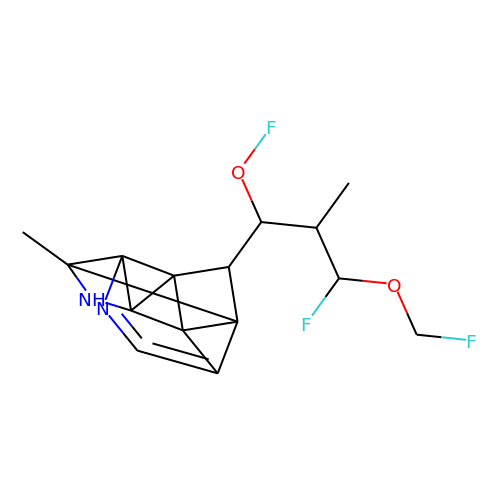

In [103]:
sol = MolGraph(MolFromSmiles("CC(C(F)OCF)C(OF)C1C23C4=C=NC56C2(C)NC52C43C162"))

sol.draw(size=500, show=False)

In [104]:
qed_score, _ = QEDEvaluationStrategy().evaluate_individual(sol)
print("QED : " + str(qed_score))


QED : 0.8021766539611267


In [105]:
sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(sol)
print("SAScore : " + str(sa_score))


SAScore : 8.481798758659105


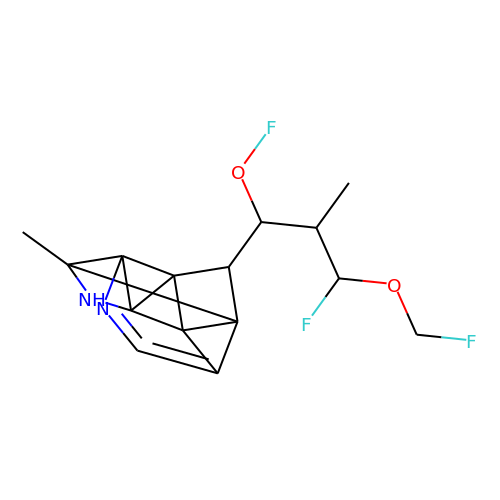

In [106]:
from os.path import join

sol.draw(write_to_path=join(output_fig_path, "mol.png"), size=500, show=False)